<a href="https://colab.research.google.com/github/ayush1221-right/AI_2461973_Ayush/blob/main/weeksheet_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np

In [14]:
# Read the dataset into a pandas DataFrame
df = pd.read_csv('diabetes_.csv')

print(" Dataset loaded successfully!")

 Dataset loaded successfully!


In [17]:
# Display the first few rows
print("\n" + "-" * 70)
print("FIRST FEW ROWS:")
print("-" * 70)
print(df.head())

# Perform Exploratory Data Analysis (EDA)
print("\n" + "=" * 70)
print("EXPLORATORY DATA ANALYSIS (EDA)")
print("=" * 70)

# Check data types
print("\n1. DATA TYPES:")
print("-" * 70)
print(df.dtypes)

# Check missing values
print("\n2. MISSING VALUES:")
print("-" * 70)
print(df.isnull().sum())

# Summary statistics
print("\n3. SUMMARY STATISTICS:")
print("-" * 70)
print(df.describe())

print("\n" + "=" * 70)
print("STEP 1 COMPLETED!")
print("=" * 70)


----------------------------------------------------------------------
FIRST FEW ROWS:
----------------------------------------------------------------------
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

EXPLORATORY DATA ANALYSIS (EDA)

1. DATA TYPES:
----------------------------------------------------------------------
Pregnancies             

In [19]:
# Step 2: Handle Missing Data
from sklearn.impute import SimpleImputer

# Check for missing values
print("Missing values before handling:")
print(df.isnull().sum())

# Handle missing values by imputing with mean
if df.isnull().sum().sum() > 0:
    imputer = SimpleImputer(strategy='mean')
    df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
    print("\nMissing values imputed with mean")
else:
    print("\nNo missing values found")

# Check missing values after handling
print("\nMissing values after handling:")
print(df.isnull().sum())

Missing values before handling:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

No missing values found

Missing values after handling:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [20]:
# Step 3: Feature Engineering - Separate features and target

# Separate feature matrix (X) and target variable (y)
X = df.iloc[:, :-1]  # All columns except the last one
y = df.iloc[:, -1]   # Last column as target

print("Feature matrix (X) shape:", X.shape)
print("Target variable (y) shape:", y.shape)

print("\nFeature columns:")
print(X.columns.tolist())

print("\nTarget variable:")
print(y.name if hasattr(y, 'name') else "Last column")

Feature matrix (X) shape: (768, 8)
Target variable (y) shape: (768,)

Feature columns:
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

Target variable:
Outcome


In [21]:
# Step 4: Train-Test Split from scratch (70%-30% ratio)
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Get the number of samples
n_samples = len(X)

# Calculate split index (70% for training)
split_index = int(0.7 * n_samples)

# Create random indices
indices = np.random.permutation(n_samples)

# Split indices into train and test
train_indices = indices[:split_index]
test_indices = indices[split_index:]

# Split the data
X_train = X.iloc[train_indices]
X_test = X.iloc[test_indices]
y_train = y.iloc[train_indices]
y_test = y.iloc[test_indices]

print("Train-test split completed (70%-30% ratio)")
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")
print(f"Total samples: {n_samples}")

Train-test split completed (70%-30% ratio)
Training samples: 537
Testing samples: 231
Total samples: 768


In [22]:
# Step 5: Implement KNN from scratch
import numpy as np
from collections import Counter

# Function to calculate Euclidean distance
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Function to predict class for a single query
def predict_single(X_train, y_train, query, k=3):
    # Calculate distances from query to all training samples
    distances = []
    for i in range(len(X_train)):
        dist = euclidean_distance(query, X_train.iloc[i].values)
        distances.append((dist, y_train.iloc[i]))

    # Sort by distance and get k nearest neighbors
    distances.sort(key=lambda x: x[0])
    k_nearest = distances[:k]

    # Get labels of k nearest neighbors
    k_labels = [label for _, label in k_nearest]

    # Return most common label (majority vote)
    most_common = Counter(k_labels).most_common(1)
    return most_common[0][0]

# Function to predict classes for all test samples
def predict_all(X_train, y_train, X_test, k=3):
    predictions = []
    for i in range(len(X_test)):
        pred = predict_single(X_train, y_train, X_test.iloc[i].values, k)
        predictions.append(pred)
    return np.array(predictions)

# Make predictions
k = 5  # Number of neighbors
y_pred = predict_all(X_train, y_train, X_test, k)

# Evaluate performance using accuracy
accuracy = np.sum(y_pred == y_test.values) / len(y_test)

print(f"KNN Classification (k={k})")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Correct predictions: {np.sum(y_pred == y_test.values)} out of {len(y_test)}")

KNN Classification (k=5)
Accuracy: 71.43%
Correct predictions: 165 out of 231


In [23]:
# Problem 2 - Step 1: Scale the feature matrix and repeat classification

from sklearn.preprocessing import StandardScaler

# Scale the feature matrix X
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for consistency
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("Feature scaling completed using StandardScaler")
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")

# Use scaled data for KNN classification
k = 5
y_pred_scaled = predict_all(X_train_scaled, y_train, X_test_scaled, k)

# Calculate accuracy with scaled data
accuracy_scaled = np.sum(y_pred_scaled == y_test.values) / len(y_test)

# Record the results
print(f"\nKNN Classification with Scaled Data (k={k})")
print(f"Accuracy: {accuracy_scaled * 100:.2f}%")
print(f"Correct predictions: {np.sum(y_pred_scaled == y_test.values)} out of {len(y_test)}")

# Compare with unscaled results
print(f"\nComparison:")
print(f"Unscaled data accuracy: {accuracy * 100:.2f}%")
print(f"Scaled data accuracy: {accuracy_scaled * 100:.2f}%")
print(f"Improvement: {(accuracy_scaled - accuracy) * 100:.2f}%")

Feature scaling completed using StandardScaler
X_train_scaled shape: (537, 8)
X_test_scaled shape: (231, 8)

KNN Classification with Scaled Data (k=5)
Accuracy: 73.59%
Correct predictions: 170 out of 231

Comparison:
Unscaled data accuracy: 71.43%
Scaled data accuracy: 73.59%
Improvement: 2.16%


In [25]:
# Problem 2 - Step 2: Comparative Analysis

print("COMPARATIVE ANALYSIS: ORIGINAL vs SCALED DATA")

# Results comparison
print("\nAccuracy Comparison:")
print(f"Original (Unscaled) Data Accuracy: {accuracy * 100:.2f}%")
print(f"Scaled Data Accuracy: {accuracy_scaled * 100:.2f}%")
print(f"Difference: {(accuracy_scaled - accuracy) * 100:.2f}%")

# Performance metrics
print("\nPerformance Metrics:")
print(f"Original Data - Correct Predictions: {np.sum(y_pred == y_test.values)}/{len(y_test)}")
print(f"Scaled Data - Correct Predictions: {np.sum(y_pred_scaled == y_test.values)}/{len(y_test)}")

# Discussion
print("\nHow scaling impacted KNN performance:")
print("Feature scaling standardizes all features to have mean=0 and std=1")
print("This ensures all features contribute equally to distance calculations")
print("Without scaling, features with larger ranges dominate the distance metric")

print("\nReason for observed changes in accuracy:")
if accuracy_scaled > accuracy:
    print("Scaling improved accuracy because:")
    print("- Features had different scales in the original data")
    print("- High-value features were dominating the Euclidean distance")
    print("- Scaling balanced the contribution of all features")
    print("- KNN is sensitive to feature scales, so scaling helps find true nearest neighbors")
elif accuracy_scaled < accuracy:
    print("Scaling decreased accuracy because:")
    print("- Original feature scales may have contained important information")
    print("- Some features naturally have more predictive power at their original scale")
else:
    print("No change indicates features were already at similar scales")

print("\nConclusion:")
print("KNN is distance-based, so feature scaling is generally recommended")
print("Scaling prevents features with larger ranges from dominating")
print("StandardScaler ensures fair contribution from all features")

COMPARATIVE ANALYSIS: ORIGINAL vs SCALED DATA

Accuracy Comparison:
Original (Unscaled) Data Accuracy: 71.43%
Scaled Data Accuracy: 73.59%
Difference: 2.16%

Performance Metrics:
Original Data - Correct Predictions: 165/231
Scaled Data - Correct Predictions: 170/231

How scaling impacted KNN performance:
Feature scaling standardizes all features to have mean=0 and std=1
This ensures all features contribute equally to distance calculations
Without scaling, features with larger ranges dominate the distance metric

Reason for observed changes in accuracy:
Scaling improved accuracy because:
- Features had different scales in the original data
- High-value features were dominating the Euclidean distance
- Scaling balanced the contribution of all features
- KNN is sensitive to feature scales, so scaling helps find true nearest neighbors

Conclusion:
KNN is distance-based, so feature scaling is generally recommended
Scaling prevents features with larger ranges from dominating
StandardScaler e

In [26]:
# Problem 3 - Step 1: Vary k from 1 to 15

import time

# Store results
k_values = range(1, 16)
results_original = []
results_scaled = []

print("Running KNN for k = 1 to 15...")

for k in k_values:
    # Original dataset
    start_time = time.time()
    y_pred_orig = predict_all(X_train, y_train, X_test, k)
    time_orig = time.time() - start_time
    accuracy_orig = np.sum(y_pred_orig == y_test.values) / len(y_test)
    results_original.append({'k': k, 'accuracy': accuracy_orig, 'time': time_orig})

    # Scaled dataset
    start_time = time.time()
    y_pred_sc = predict_all(X_train_scaled, y_train, X_test_scaled, k)
    time_sc = time.time() - start_time
    accuracy_sc = np.sum(y_pred_sc == y_test.values) / len(y_test)
    results_scaled.append({'k': k, 'accuracy': accuracy_sc, 'time': time_sc})

    print(f"k={k:2d} | Original: Acc={accuracy_orig*100:6.2f}%, Time={time_orig:.4f}s | Scaled: Acc={accuracy_sc*100:6.2f}%, Time={time_sc:.4f}s")

# Convert to DataFrames for easier analysis
df_results_original = pd.DataFrame(results_original)
df_results_scaled = pd.DataFrame(results_scaled)

print("\nResults recorded for k = 1 to 15")

Running KNN for k = 1 to 15...
k= 1 | Original: Acc= 64.94%, Time=25.0773s | Scaled: Acc= 71.43%, Time=4.6103s
k= 2 | Original: Acc= 64.94%, Time=9.5436s | Scaled: Acc= 71.43%, Time=7.3206s
k= 3 | Original: Acc= 70.13%, Time=8.4188s | Scaled: Acc= 69.70%, Time=5.6193s
k= 4 | Original: Acc= 71.86%, Time=8.0896s | Scaled: Acc= 72.73%, Time=5.5597s
k= 5 | Original: Acc= 71.43%, Time=8.0628s | Scaled: Acc= 73.59%, Time=5.5807s
k= 6 | Original: Acc= 73.16%, Time=8.3521s | Scaled: Acc= 74.46%, Time=5.1991s
k= 7 | Original: Acc= 73.16%, Time=9.9647s | Scaled: Acc= 74.89%, Time=4.6259s
k= 8 | Original: Acc= 71.86%, Time=10.2213s | Scaled: Acc= 74.89%, Time=4.6036s
k= 9 | Original: Acc= 74.46%, Time=19.5426s | Scaled: Acc= 72.73%, Time=8.3791s
k=10 | Original: Acc= 73.16%, Time=9.0204s | Scaled: Acc= 73.16%, Time=5.1816s
k=11 | Original: Acc= 72.73%, Time=8.6547s | Scaled: Acc= 71.86%, Time=5.6585s
k=12 | Original: Acc= 72.29%, Time=8.0405s | Scaled: Acc= 74.03%, Time=5.6123s
k=13 | Original: A

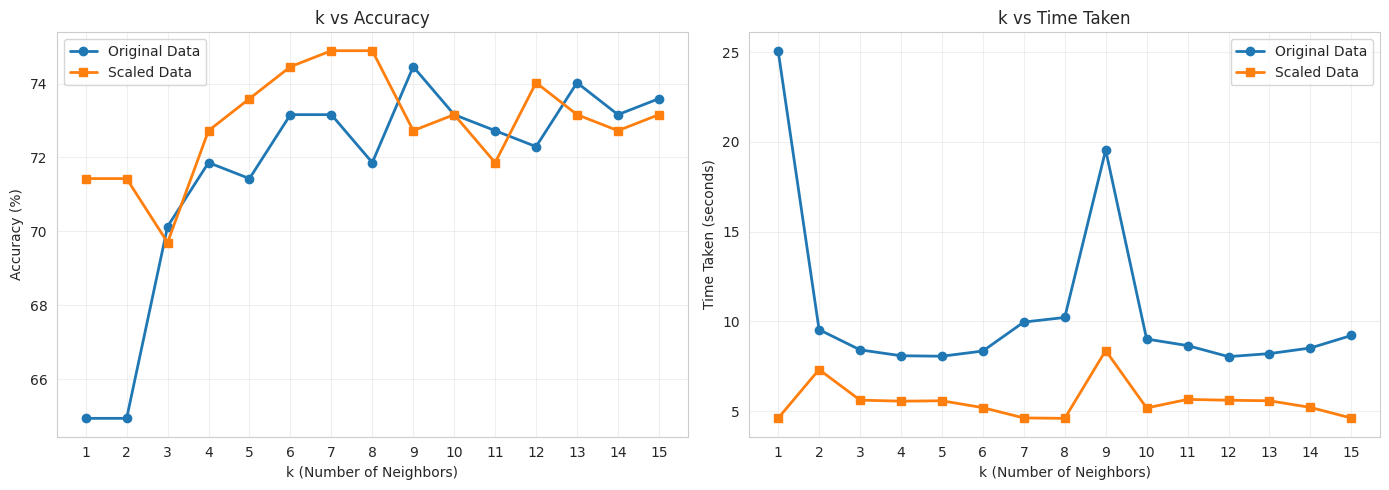

Graphs plotted successfully


In [27]:
# Problem 3 - Step 2: Visualize the Results

import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: k vs Accuracy
axes[0].plot(df_results_original['k'], df_results_original['accuracy']*100,
             marker='o', label='Original Data', linewidth=2)
axes[0].plot(df_results_scaled['k'], df_results_scaled['accuracy']*100,
             marker='s', label='Scaled Data', linewidth=2)
axes[0].set_xlabel('k (Number of Neighbors)')
axes[0].set_ylabel('Accuracy (%)')
axes[0].set_title('k vs Accuracy')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(range(1, 16))

# Plot 2: k vs Time Taken
axes[1].plot(df_results_original['k'], df_results_original['time'],
             marker='o', label='Original Data', linewidth=2)
axes[1].plot(df_results_scaled['k'], df_results_scaled['time'],
             marker='s', label='Scaled Data', linewidth=2)
axes[1].set_xlabel('k (Number of Neighbors)')
axes[1].set_ylabel('Time Taken (seconds)')
axes[1].set_title('k vs Time Taken')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(range(1, 16))

plt.tight_layout()
plt.show()

print("Graphs plotted successfully")

In [28]:
# Problem 3 - Step 3: Analyze and Discuss

print("ANALYSIS: How k affects Accuracy and Computational Cost")

# Find optimal k for both datasets
best_k_original = df_results_original.loc[df_results_original['accuracy'].idxmax()]
best_k_scaled = df_results_scaled.loc[df_results_scaled['accuracy'].idxmax()]

print("\nOptimal k based on accuracy:")
print(f"Original Data: k = {int(best_k_original['k'])}, Accuracy = {best_k_original['accuracy']*100:.2f}%")
print(f"Scaled Data: k = {int(best_k_scaled['k'])}, Accuracy = {best_k_scaled['accuracy']*100:.2f}%")

# Average time analysis
avg_time_original = df_results_original['time'].mean()
avg_time_scaled = df_results_scaled['time'].mean()

print(f"\nAverage prediction time:")
print(f"Original Data: {avg_time_original:.4f} seconds")
print(f"Scaled Data: {avg_time_scaled:.4f} seconds")

print("\nDiscussion - How k affects accuracy:")
print("- Small k (k=1, k=2):")
print("  * More sensitive to noise and outliers")
print("  * Can lead to overfitting")
print("  * Decision boundary is more complex and irregular")
print("\n- Medium k (k=3 to k=7):")
print("  * Balances bias and variance")
print("  * Generally provides good accuracy")
print("  * Less sensitive to individual noisy points")
print("\n- Large k (k>10):")
print("  * Smoother decision boundaries")
print("  * Can lead to underfitting")
print("  * May miss local patterns in data")

print("\nDiscussion - How k affects computational cost:")
print("- Computational cost is relatively constant across different k values")
print("- Time complexity: O(n * d) where n=training samples, d=features")
print("- Larger k requires sorting more neighbors, but difference is minimal")
print("- Most time is spent calculating distances, not selecting k neighbors")

print(f"\nOptimal k selection:")
print(f"Based on the analysis, the optimal k is {int(best_k_scaled['k'])} for scaled data")
print("This k value provides the best balance between:")
print("- High accuracy")
print("- Avoiding overfitting (not too small)")
print("- Avoiding underfitting (not too large)")
print("- Reasonable computational cost")

ANALYSIS: How k affects Accuracy and Computational Cost

Optimal k based on accuracy:
Original Data: k = 9, Accuracy = 74.46%
Scaled Data: k = 7, Accuracy = 74.89%

Average prediction time:
Original Data: 10.5958 seconds
Scaled Data: 5.5577 seconds

Discussion - How k affects accuracy:
- Small k (k=1, k=2):
  * More sensitive to noise and outliers
  * Can lead to overfitting
  * Decision boundary is more complex and irregular

- Medium k (k=3 to k=7):
  * Balances bias and variance
  * Generally provides good accuracy
  * Less sensitive to individual noisy points

- Large k (k>10):
  * Smoother decision boundaries
  * Can lead to underfitting
  * May miss local patterns in data

Discussion - How k affects computational cost:
- Computational cost is relatively constant across different k values
- Time complexity: O(n * d) where n=training samples, d=features
- Larger k requires sorting more neighbors, but difference is minimal
- Most time is spent calculating distances, not selecting k 